In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [5]:
# read data
df = pd.read_csv('dielectron.csv')
df.head(5)

#drop run and event number
df.drop(['Run','Event'], axis=1, inplace=True)

In [6]:
df.head(5)

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   E1      100000 non-null  float64
 1   px1     100000 non-null  float64
 2   py1     100000 non-null  float64
 3   pz1     100000 non-null  float64
 4   pt1     100000 non-null  float64
 5   eta1    100000 non-null  float64
 6   phi1    100000 non-null  float64
 7   Q1      100000 non-null  int64  
 8   E2      100000 non-null  float64
 9   px2     100000 non-null  float64
 10  py2     100000 non-null  float64
 11  pz2     100000 non-null  float64
 12  pt2     100000 non-null  float64
 13  eta2    100000 non-null  float64
 14  phi2    100000 non-null  float64
 15  Q2      100000 non-null  int64  
 16  M       99915 non-null   float64
dtypes: float64(15), int64(2)
memory usage: 13.0 MB


In [8]:
# check null values
df.isnull().sum()

E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M       85
dtype: int64

In [9]:
# delete null values
df = df.dropna(axis=0)
df.isnull().sum()

E1      0
px1     0
py1     0
pz1     0
pt1     0
eta1    0
phi1    0
Q1      0
E2      0
px2     0
py2     0
pz2     0
pt2     0
eta2    0
phi2    0
Q2      0
M       0
dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

23

In [11]:
# delete duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

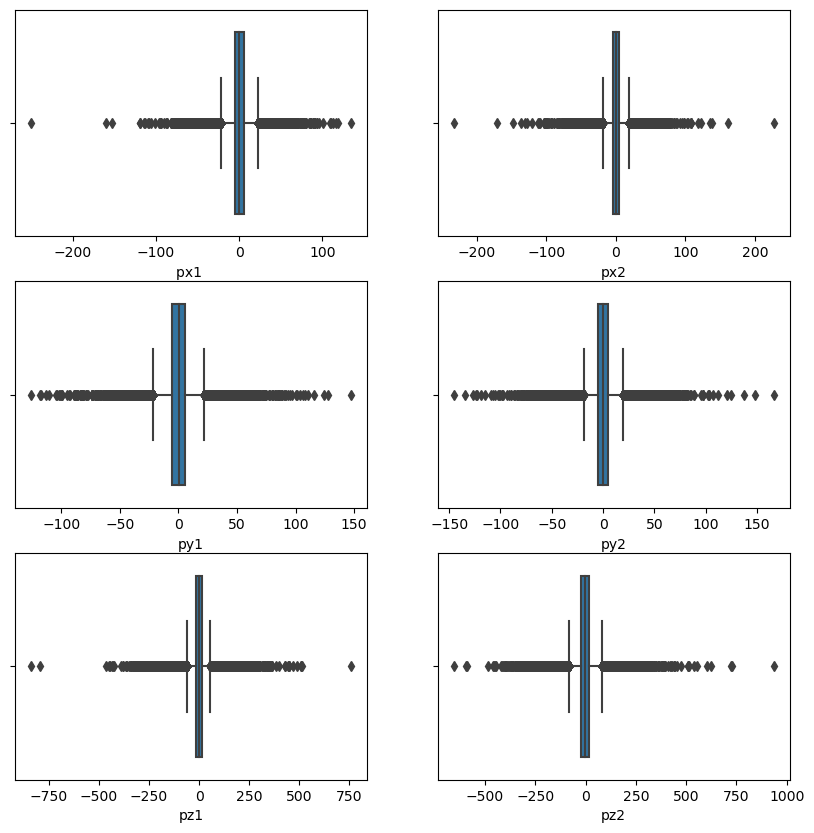

In [30]:
#detect outliers for px1,px2,py1,py2,pz1,pz2 us boxplot
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.boxplot(x=df['px1 '])
plt.subplot(3,2,2)
sns.boxplot(x=df['px2'])
plt.subplot(3,2,3)
sns.boxplot(x=df['py1'])
plt.subplot(3,2,4)
sns.boxplot(x=df['py2'])
plt.subplot(3,2,5)
sns.boxplot(x=df['pz1'])
plt.subplot(3,2,6)
sns.boxplot(x=df['pz2'])
plt.show()



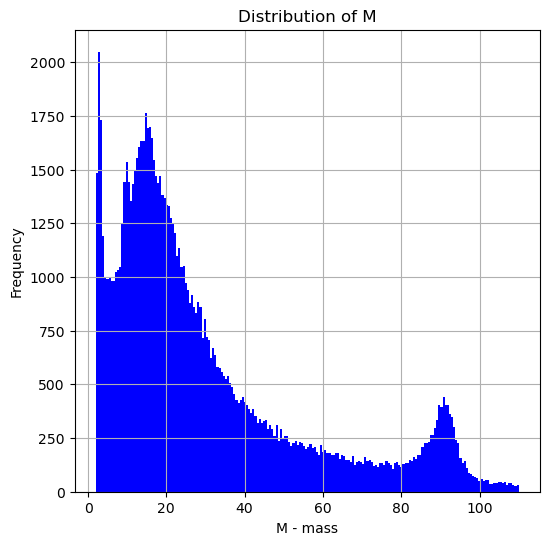

In [12]:
# plot distribution of mass
plt.figure(figsize=(6,6))
df.M.plot(kind='hist', bins=200, color='blue')
plt.title('Distribution of M')
plt.xlabel('M - mass')
plt.grid()
plt.show()

In [13]:
# generate data
features = df.drop(['M'], axis=1).to_numpy()
labels = df.M.to_numpy()

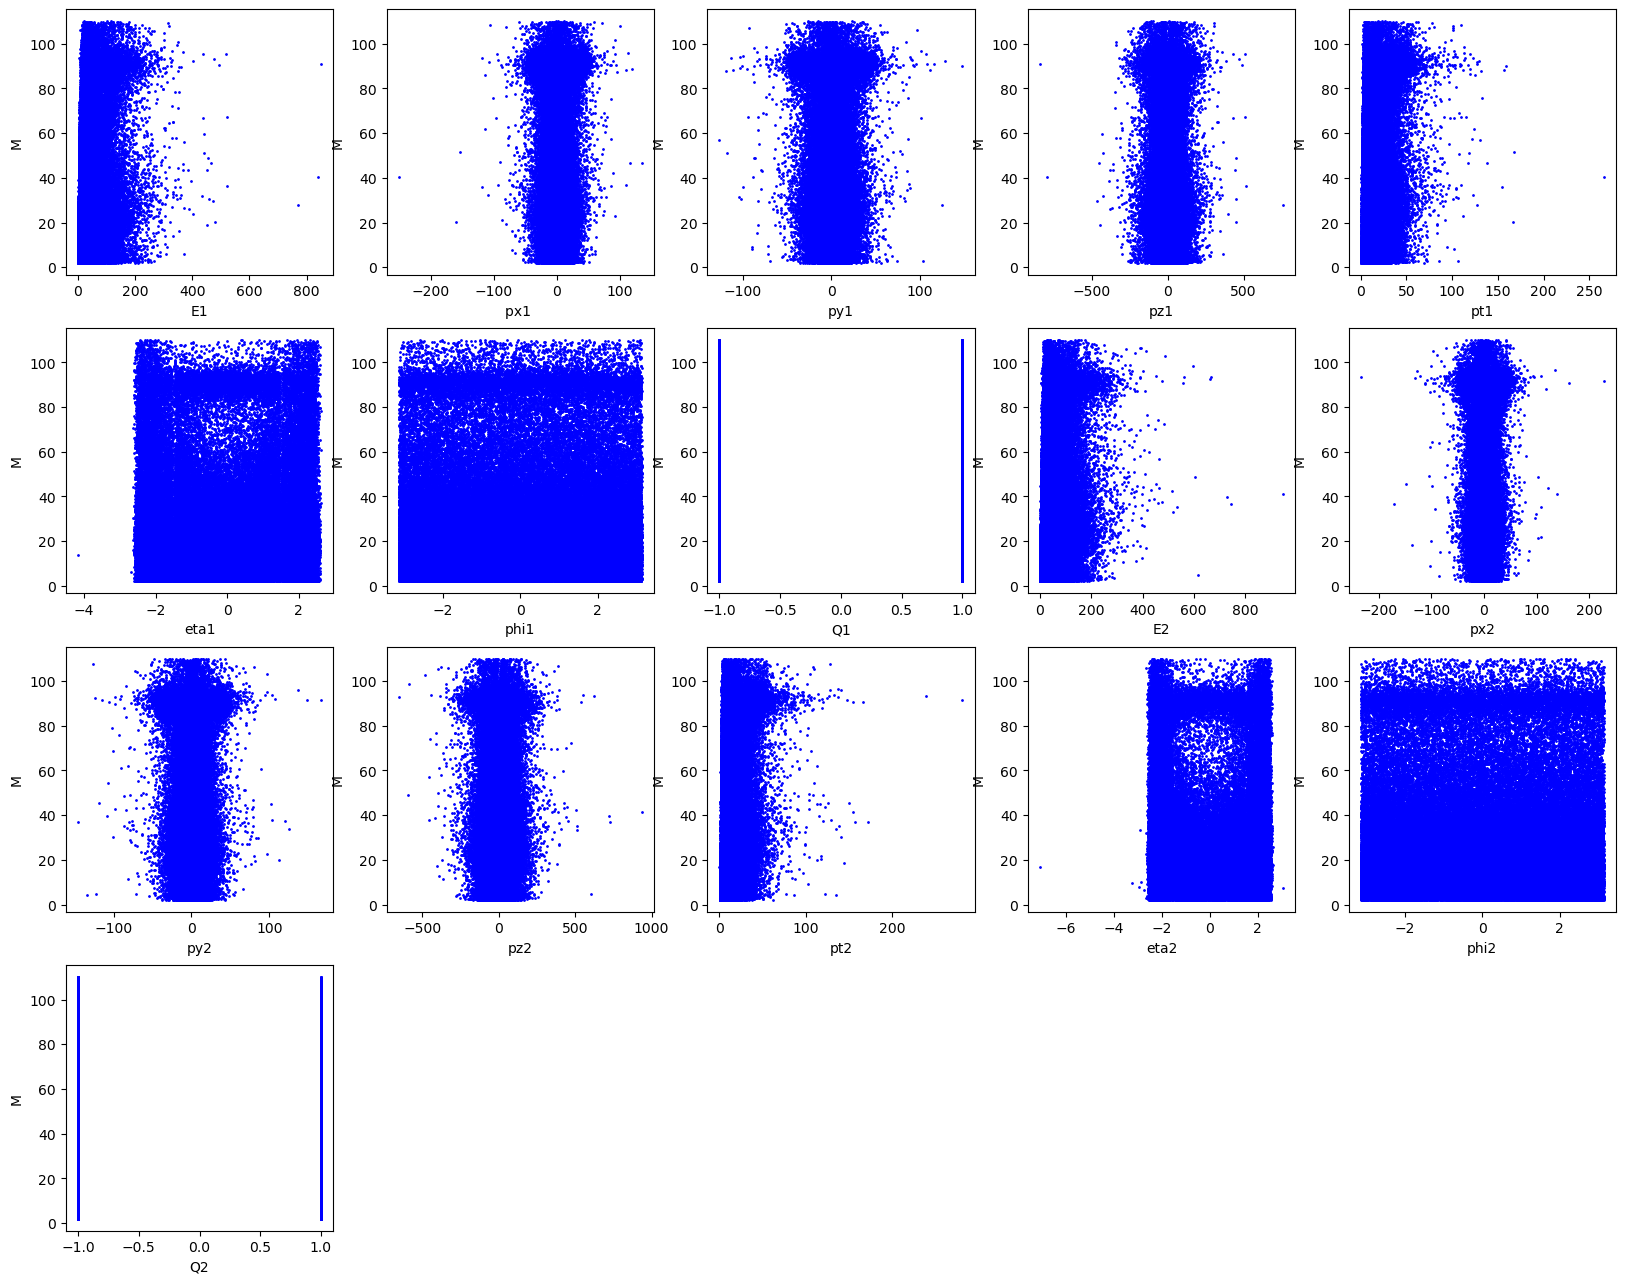

In [17]:
#create a scatte plot between M and each feature
plt.figure(figsize=(20,20))
for i in range(0, features.shape[1]):
    plt.subplot(5, 5, i+1)
    plt.scatter(features[:,i], labels, color='blue', s=1)
    plt.xlabel(df.columns[i])
    plt.ylabel('M')
plt.show()


In [ ]:
# split data into train, test and validation sets
X, X_test, y, y_test = train_test_split(features, labels, test_size=0.2,train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25,train_size =0.75)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((59934, 18), (59934,), (19979, 18), (19979,), (19979, 18), (19979,))

In [ ]:
# standardize data
X_test_std = StandardScaler().fit_transform(X_test)
X_train_std = StandardScaler().fit_transform(X_train)

np.allclose(X_train.mean(axis=0), np.zeros(X_train.shape[1])),\
    np.allclose(X_train_std.mean(axis=0),np.zeros(X_train_std.shape[1])),\
        np.allclose(X_train.std(axis=0), np.ones(X_train.shape[1])),\
            np.allclose(X_train_std.std(axis=0), np.ones(X_train_std.shape[1]))

(False, True, False, True)

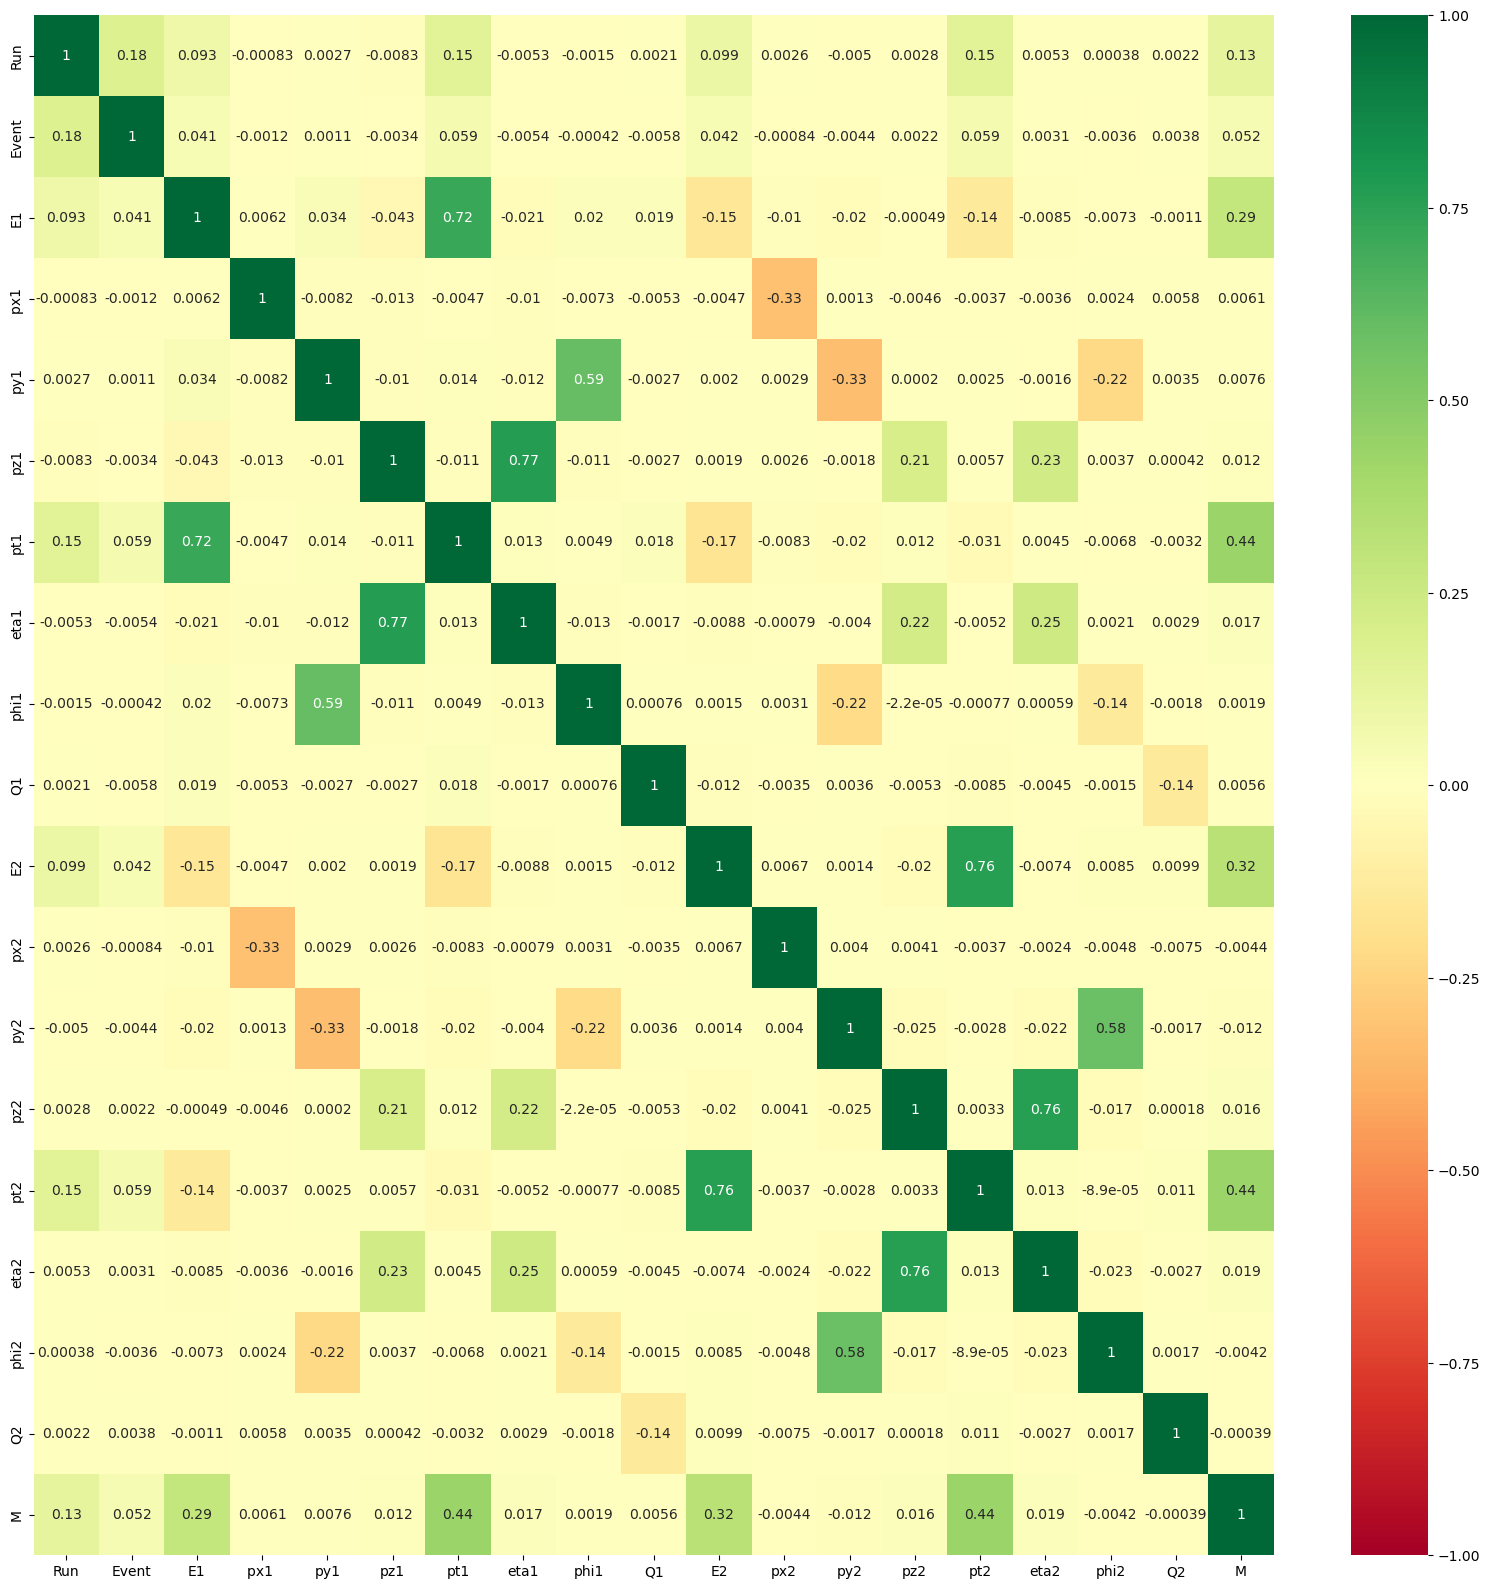

In [ ]:
corr = df.corr()

fig = plt.figure(figsize = (20,20))
sns.heatmap(corr, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1)
plt.show()

[0.0039071  0.00788721 0.09450368 0.00872075 0.00880451 0.09014325
 0.19723535 0.07661147 0.00706546 0.00082198 0.1022965  0.00873902
 0.00893191 0.08377073 0.21783809 0.07431489 0.0075469  0.00086119]
2.396179181878991
6.451431320051042


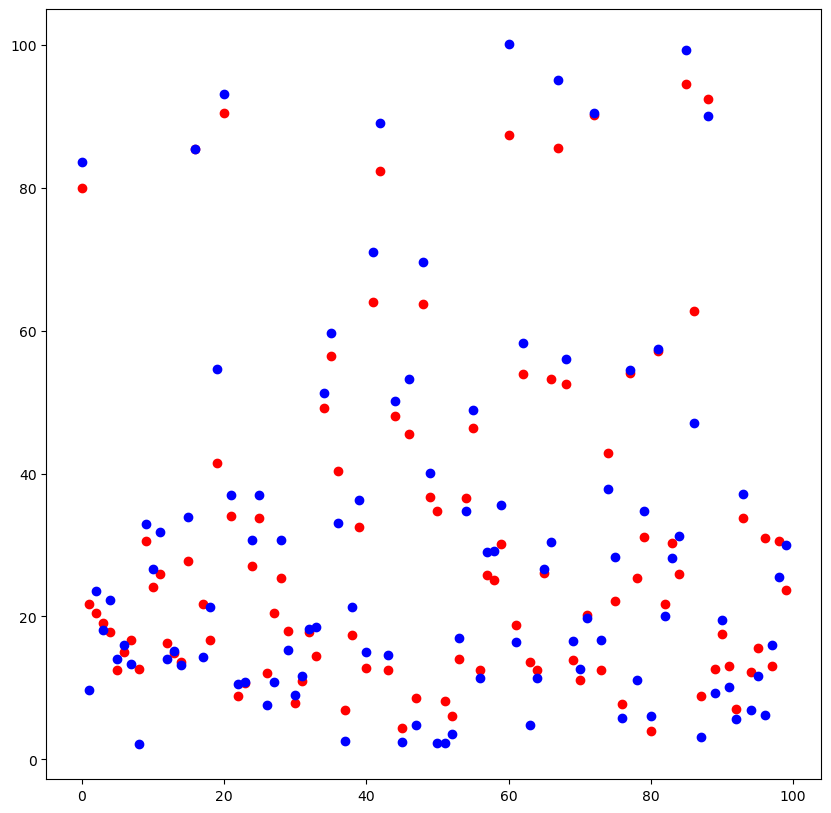

In [ ]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train_std, y_train)
print(clf.feature_importances_)
y_pred = clf.predict(X_train_std)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(rmse)
y_pred = clf.predict(X_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
figure = plt.figure(figsize=(10,10))
plt.scatter(range(100), y_pred[:100], c="red")
plt.scatter(range(100), y_test[:100], c="blue")
plt.show()

In [ ]:
clf = tree.DecisionTreeRegressor()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_train_std)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(rmse)
y_pred = clf.predict(X_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.0


11.520641180164638

In [ ]:
regr = MLPRegressor(max_iter=1000, learning_rate="adaptive").fit(X_train, y_train)
y_pred = regr.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(rmse)
y_pred = regr.predict(X_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1174.9345629376694


39.39251304368783

19.468605940455703


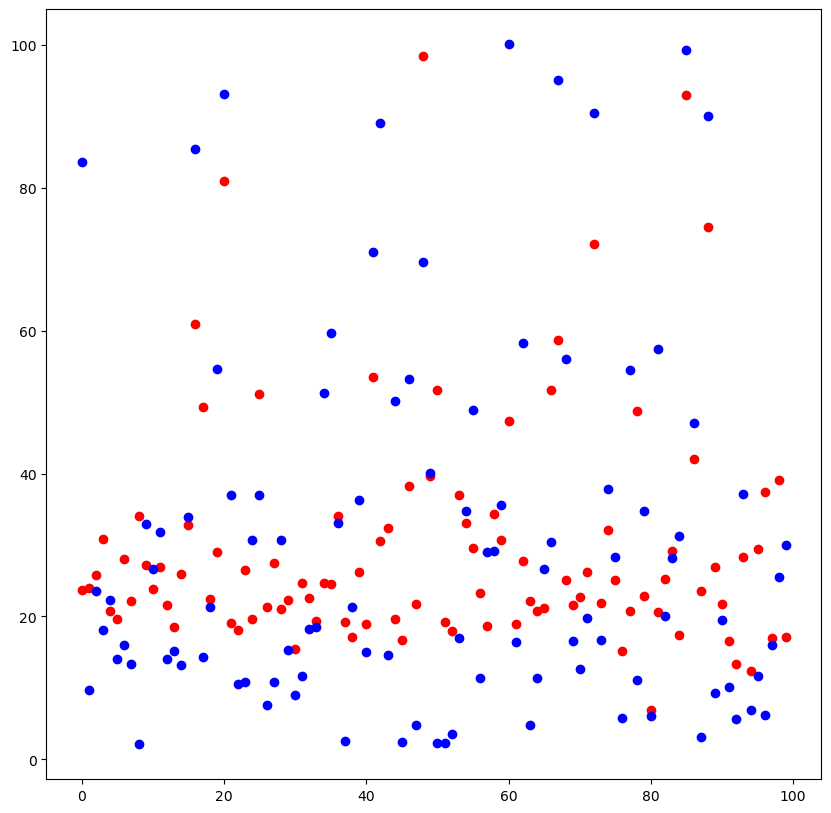

In [ ]:
clf = LinearRegression()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_train_std)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(rmse)
y_pred = clf.predict(X_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse
figure = plt.figure(figsize=(10,10))
plt.scatter(range(100), y_pred[:100], c="red")
plt.scatter(range(100), y_test[:100], c="blue")
plt.show()